# Path Finding And Following

Combining our simulated controller and pathfinding work. Can we find a path and follow it?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from robot_child.path_following.pure_pursuit import PointController, PurePursuitController, Robot, Point as PPoint
from robot_child.pathfinding.search import load_map, bfs

In [2]:
STEPS_PER_SECOND = 10
dt = 1/STEPS_PER_SECOND

## Load Map

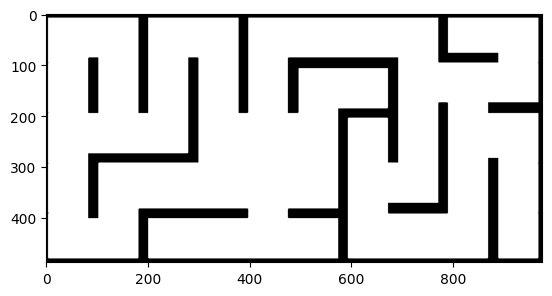

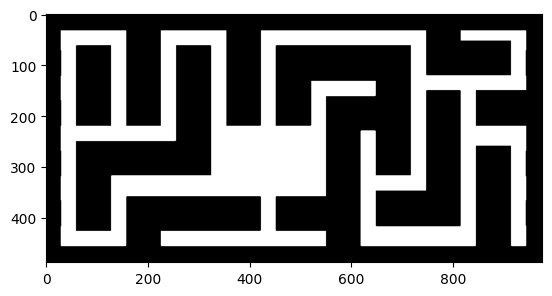

In [3]:
map, occ = load_map("example_grid.png")

plt.imshow(map, cmap='binary')
plt.show()
plt.imshow(occ, cmap='binary')
plt.show()

## Find Path

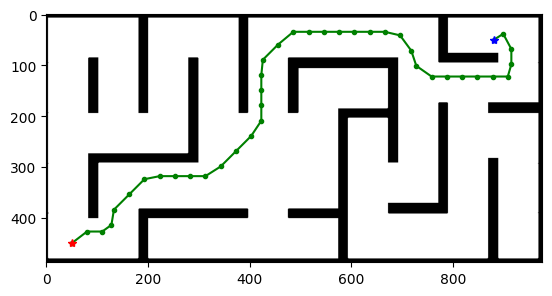

In [4]:
def Point(x, y):
    return (x, y)

start, end = Point(50, 450), Point(880, 50)
path_plan = bfs(start, end, occ.T)
step_size = 30
path_plan_sampled = [*path_plan[::step_size], path_plan[-1]]

plt.imshow(map, cmap='binary')
plt.plot([p[0] for p in path_plan_sampled], [p[1] for p in path_plan_sampled], 'g.-')
plt.plot(start[0], start[1], 'r*')
plt.plot(end[0], end[1], 'b*')
plt.show()

## Follow Path

In [5]:
def simulate(dt, robot, controller, steps_max):
    history = []
    steps_taken = 0
    while not controller.is_complete(robot):
        robot.velocity, robot.angular_velocity = controller.control(robot, dt)
        robot.step(dt)
        steps_taken += 1
        history.append((robot.x, robot.y, robot.velocity, robot.angular_velocity))
        if steps_taken >= steps_max:
            return False, np.array(history)
    return True, np.array(history)

In [6]:
points = [PPoint(point[0], point[1]) for point in path_plan_sampled]

point_controller = PointController(tolerance=1, KHp=8, KHi=0)
path_controller = PurePursuitController(point_controller=point_controller, points=points)
bot = Robot(x=points[0].x, y=points[1].y)

status, history = simulate(dt, bot, path_controller, 2000)
assert status, "could not reach goal within step limit"

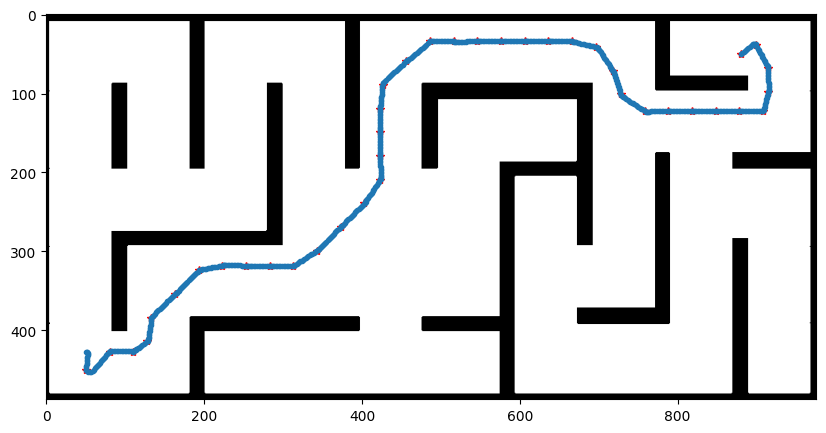

In [7]:
def plot_history(ax, points, history):
    for p in points:
        ax.plot(p.x, p.y, 'r*')
    ax.plot(history[:, 0], history[:, 1], '.-')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(map, cmap="binary")
plot_history(ax, points, history)

In [8]:
len(history)

729

In [9]:
f"{len(history) / STEPS_PER_SECOND:.0f} seconds"

'73 seconds'